In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
data = pd.read_csv('survey_results_public.csv')

In [12]:
data.head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

# Handle Missing Values

In [17]:
# Identify missing values
missing_values = data.isnull().sum()

In [18]:
print(missing_values)

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64


In [15]:
# Define the threshold for missing values
#Dropping columns with more than 50% missing values
threshold = 0.5 * len(data)
data_cleaned = data.dropna(thresh=threshold, axis=1)

In [23]:
print(data_cleaned.head(2))

    ResponseId     Q120                      MainBranch              Age  \
1            2  I agree  I am a developer by profession  25-34 years old   
15          16  I agree  I am a developer by profession  35-44 years old   

             Employment                            RemoteWork  \
1   Employed, full-time                                Remote   
15  Employed, full-time  Hybrid (some remote, some in-person)   

                                     CodingActivities  \
1   Hobby;Contribute to open-source projects;Boots...   
15  Hobby;Contribute to open-source projects;Profe...   

                                            EdLevel  \
1      Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
15  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                            LearnCode  \
1   Books / Physical media;Colleague;Friend or fam...   
15  Books / Physical media;Other online resources ...   

                                      LearnCodeOnline  ...  \
1  

In [30]:
# Fill NaN values in categorical columns with the mode
categorical_columns = ['Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode']
for column in categorical_columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mode()[0])

In [33]:
# Fill NaN values in numerical columns with the median
numerical_columns = ['ConvertedCompYearly']
for column in numerical_columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].median())

In [34]:
# Display the cleaned data
print("Cleaned Stack Overflow Survey Data Without NaN Values")
print(data_cleaned.head())

Cleaned Stack Overflow Survey Data Without NaN Values
     ResponseId     Q120                      MainBranch              Age  \
1             2  I agree  I am a developer by profession  25-34 years old   
15           16  I agree  I am a developer by profession  35-44 years old   
32           33  I agree  I am a developer by profession  25-34 years old   
37           38  I agree  I am a developer by profession  25-34 years old   
116         117  I agree  I am a developer by profession  35-44 years old   

              Employment                            RemoteWork  \
1    Employed, full-time                                Remote   
15   Employed, full-time  Hybrid (some remote, some in-person)   
32   Employed, full-time  Hybrid (some remote, some in-person)   
37   Employed, full-time                                Remote   
116  Employed, full-time                                Remote   

                                      CodingActivities  \
1    Hobby;Contribute to ope

In [51]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2444 entries, 1 to 89143
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      2444 non-null   int64  
 1   Q120                            2444 non-null   object 
 2   MainBranch                      2444 non-null   object 
 3   Age                             2444 non-null   object 
 4   Employment                      2444 non-null   object 
 5   RemoteWork                      2444 non-null   object 
 6   CodingActivities                2444 non-null   object 
 7   EdLevel                         2444 non-null   object 
 8   LearnCode                       2444 non-null   object 
 9   LearnCodeOnline                 2444 non-null   object 
 10  YearsCode                       2444 non-null   object 
 11  YearsCodePro                    2444 non-null   object 
 12  DevType                         2

# Descriptive Statistics

# calculating some basic descriptive statistics for the cleaned data.

In [37]:
# Descriptive statistics for numerical columns
numerical_stats = data_cleaned.describe()

# Descriptive statistics for categorical columns
categorical_stats = data_cleaned.describe(include=['object'])

# Display the descriptive statistics
print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

print("\nDescriptive Statistics for Categorical Columns:")
print(categorical_stats)


Descriptive Statistics for Numerical Columns:
         ResponseId     CompTotal  ConvertedCompYearly
count   2444.000000  2.444000e+03         2.444000e+03
mean   42730.804419  1.153125e+07         9.710570e+04
std    24800.118325  1.697872e+08         8.512034e+04
min        2.000000  3.000000e+01         1.000000e+00
25%    22120.000000  7.000000e+04         4.665900e+04
50%    41603.500000  1.300000e+05         8.000000e+04
75%    64012.750000  2.500000e+05         1.300000e+05
max    89144.000000  5.500000e+09         1.500000e+06

Descriptive Statistics for Categorical Columns:
           Q120                      MainBranch              Age  \
count      2444                            2444             2444   
unique        1                               2                7   
top     I agree  I am a developer by profession  25-34 years old   
freq       2444                            2318             1155   

                 Employment RemoteWork CodingActivities  \
count     

# Exploratory Data Analysis (EDA)

# Performing EDA helps in understanding the data better and finding interesting patterns.

Correlation Matrix:
                     ResponseId  CompTotal  ConvertedCompYearly
ResponseId             1.000000  -0.019958            -0.020802
CompTotal             -0.019958   1.000000            -0.014124
ConvertedCompYearly   -0.020802  -0.014124             1.000000


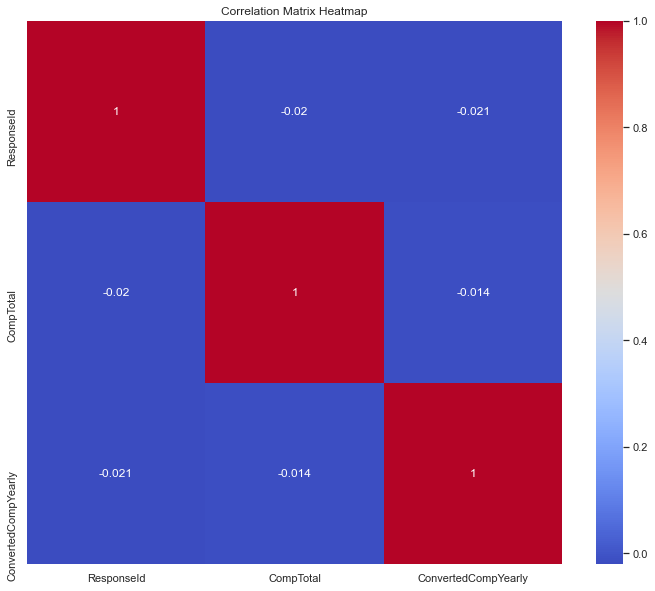

In [47]:
# Correlation matrix for numerical columns
correlation_matrix = data_cleaned.corr(numeric_only=True)

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# With the cleaned dataset, here are a few analysis questions that explored:

In [ ]:
#What are the most common job roles (DevType) among developers?

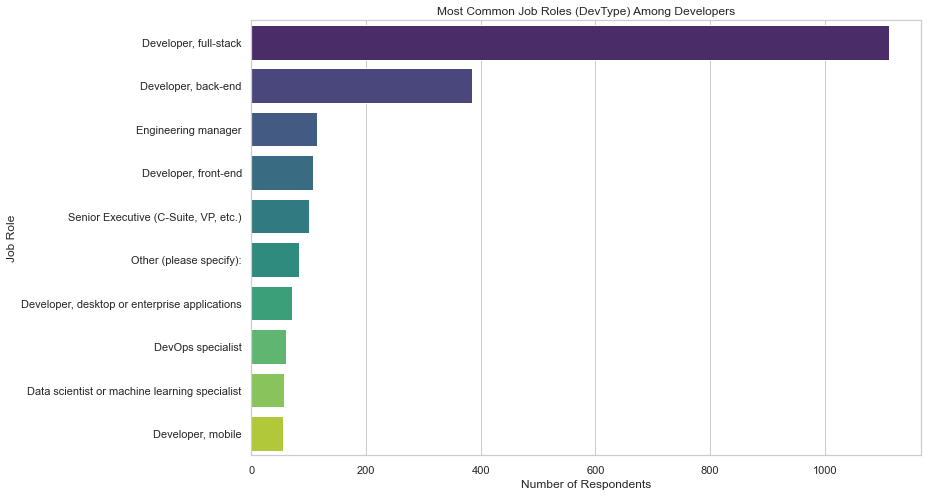

In [52]:
# Ensure that 'DevType' column exists
if 'DevType' in data_cleaned.columns:
    # Split the 'DevType' column into separate roles
    devtype_series = data_cleaned['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
    
    # Count the occurrences of each role
    devtype_counts = devtype_series.value_counts().head(10)
    
    # Plotting the most common job roles
    plt.figure(figsize=(12, 8))
    sns.barplot(x=devtype_counts.values, y=devtype_counts.index, palette='viridis')
    plt.title('Most Common Job Roles (DevType) Among Developers')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Job Role')
    plt.show()
else:
    print("The 'DevType' column is not present in the dataset.")

In [ ]:
#How much does remote working matter to employees?

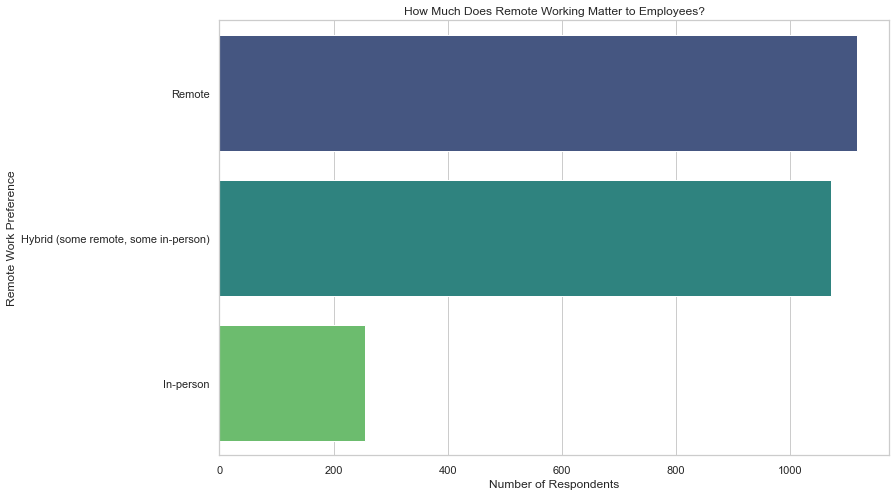

In [53]:
# Ensure that 'RemoteWork' column exists
if 'RemoteWork' in data_cleaned.columns:
    # Count the occurrences of each remote work preference
    remote_work_counts = data_cleaned['RemoteWork'].value_counts()
    
    # Plotting the remote work preferences
    plt.figure(figsize=(12, 8))
    sns.barplot(x=remote_work_counts.values, y=remote_work_counts.index, palette='viridis')
    plt.title('How Much Does Remote Working Matter to Employees?')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Remote Work Preference')
    plt.show()
else:
    print("The 'RemoteWork' column is not present in the dataset.")

In [ ]:
#how does coding experience effect the level of pay?

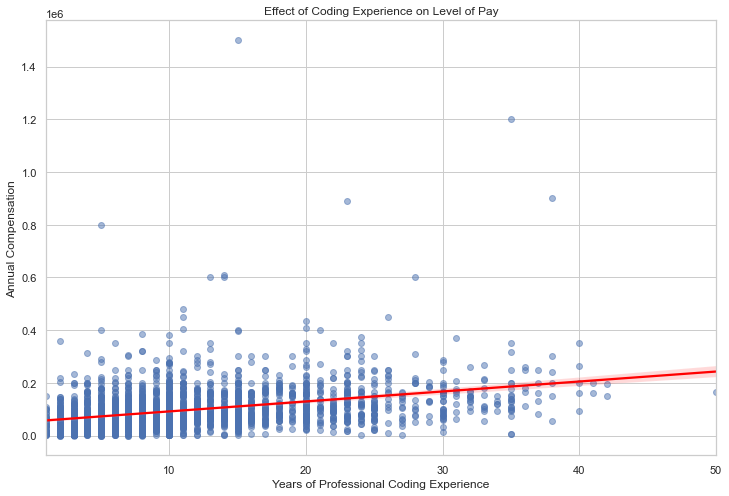

In [67]:
# Convert 'YearsCodePro' to numeric, forcing errors to NaN and then filling them with the median
data_cleaned['YearsCodePro'] = pd.to_numeric(data_cleaned['YearsCodePro'], errors='coerce')
data_cleaned['YearsCodePro'] = data_cleaned['YearsCodePro'].fillna(data_cleaned['YearsCodePro'].median())

# Ensure that 'YearsCodePro' and 'ConvertedCompYearly' columns exist
if 'YearsCodePro' in data_cleaned.columns and 'ConvertedCompYearly' in data_cleaned.columns:
    # Scatter plot with regression line
    plt.figure(figsize=(12, 8))
    sns.regplot(x='YearsCodePro', y='ConvertedCompYearly', data=data_cleaned, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title('Effect of Coding Experience on Level of Pay')
    plt.xlabel('Years of Professional Coding Experience')
    plt.ylabel('Annual Compensation')
    plt.show()
else:
    print("The required columns 'YearsCodePro' and 'ConvertedCompYearly' are not present in the dataset.")

In [ ]:
#what is the most popular method of learning to code?

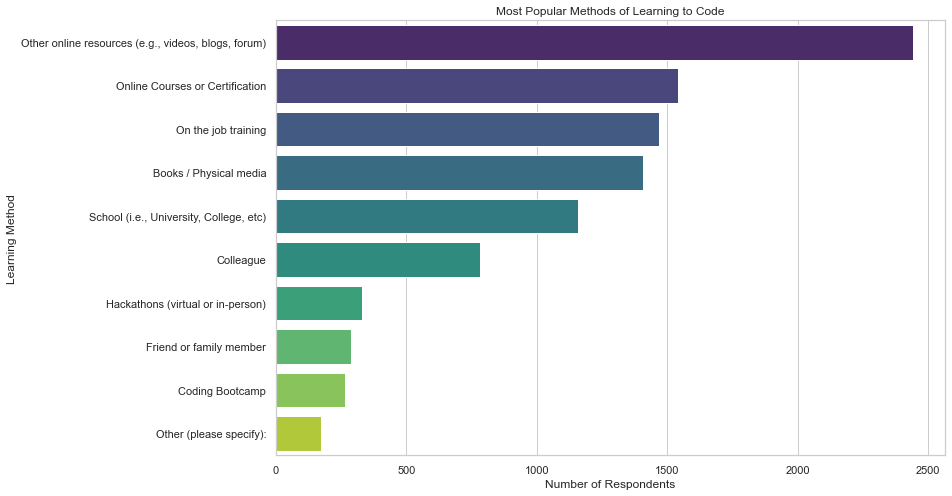

In [66]:
# Ensure that 'LearnCode' column exists
if 'LearnCode' in data_cleaned.columns:
    # Split the 'LearnCode' column into separate methods
    learncode_series = data_cleaned['LearnCode'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
    
    # Count the occurrences of each learning method
    learncode_counts = learncode_series.value_counts().head(10)
    
    # Plotting the most popular methods of learning to code
    plt.figure(figsize=(12, 8))
    sns.barplot(x=learncode_counts.values, y=learncode_counts.index, palette='viridis')
    plt.title('Most Popular Methods of Learning to Code')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Learning Method')
    plt.show()
else:
    print("The 'LearnCode' column is not present in the dataset.")

In [ ]:
#How does the employment status (Employment) distribution look like among developers?

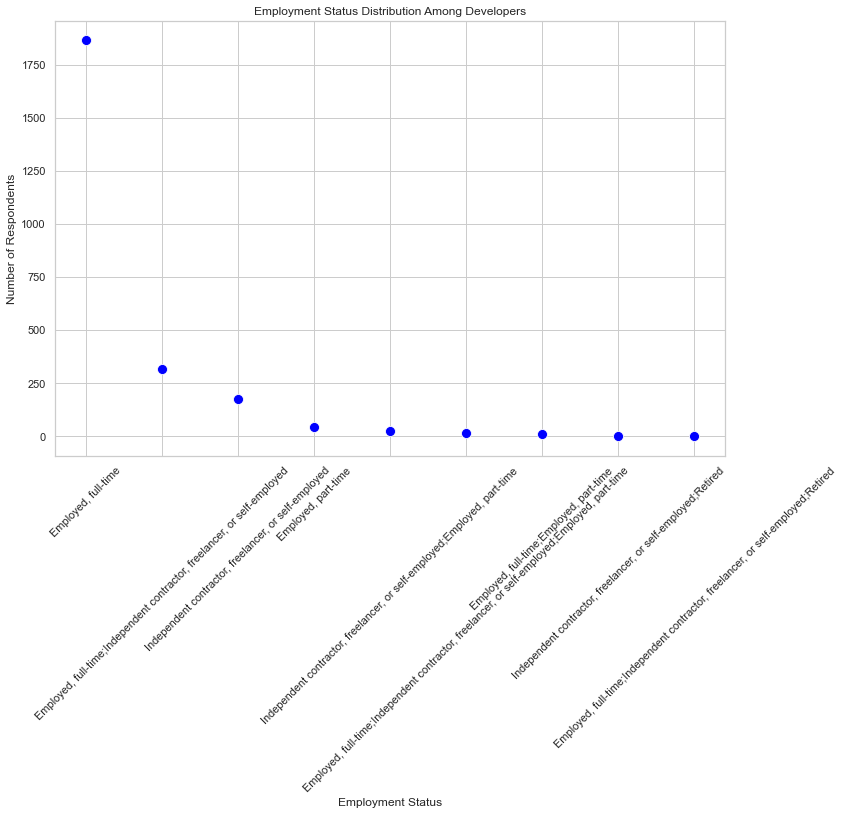

In [65]:
# Ensure that 'Employment' column exists
if 'Employment' in data_cleaned.columns:
    # Count the occurrences of each employment status
    employment_counts = data_cleaned['Employment'].value_counts()

    # Create a scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=employment_counts.index, y=employment_counts.values, s=100, color='blue', marker='o')
    plt.title('Employment Status Distribution Among Developers')
    plt.xlabel('Employment Status')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()